In [1]:
#from __future__ import print_function
import sys
#sys.path.append('/Users/carlosbelardi/miniconda3/lib/python3.7/site-packages'),
import vamp
import librosa
from librosa import display
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from IPython.display import Audio
import csv
import pandas as pd
import pychorus
import numpy as np
import scipy as sp
from numpy import linalg as LA
import os, glob

In [2]:
# # pychorus.find_and_output_chorus('SweetCaroline.wav', 'SweetCarolineChorus.wav')
# # pychorus.find_and_output_chorus('GetLucky.wav', 'GetLuckyChorus.wav')
# # pychorus.find_and_output_chorus('PumpedUpKicks.wav', 'PumpedUpKicksChorus.wav')
# # pychorus.find_and_output_chorus('ILikeItLikeThat.wav', 'ILikeItLikeThatChorus.wav', 20)

# audio_sc, sr = librosa.load('SweetCarolineChorus.wav', sr=44100, mono=True)
# audio_gl, sr = librosa.load('GetLuckyChorus.wav', sr=44100, mono=True)
# audio_p, sr = librosa.load('PumpedUpKicksChorus.wav', sr=44100, mono=True)
# audio_sm, sr = librosa.load('StacysMom.wav', sr=44100, mono=True)

# hum, hsr = librosa.load('SweetCarolineHum.wav', sr=44100, mono=True)


# print(audio_sm.shape)
# print(hum.shape)
# Audio(audio_sc, rate=sr)

(8732207,)
(417784,)


In [26]:
path = '.'

for filename in glob.glob(os.path.join(path, '*.wav')):
    print(filename[2:-4]+"Chorus.wav")
    pychorus.find_and_output_chorus(filename, "./Chorus/"+filename[2:-4]+"Chorus.wav")
    

AfricaChorus.wav
Best chorus found at 3 min 16.97 sec
AllStarChorus.wav
Best chorus found at 0 min 55.90 sec
AmericanBoyChorus.wav
Best chorus found at 4 min 12.79 sec
AnnaSunChorus.wav
Best chorus found at 3 min 45.08 sec
BeautifulGirlsChorus.wav
Best chorus found at 3 min 28.90 sec
BelieveChorus.wav
Best chorus found at 3 min 23.20 sec
BodakYellowChorus.wav
Best chorus found at 1 min 45.49 sec
CaliforniaGurlsChorus.wav
Best chorus found at 2 min 9.58 sec
CallMeMaybeChorus.wav
Best chorus found at 2 min 25.79 sec
ClintEastwoodChorus.wav
Best chorus found at 4 min 37.79 sec
CongratulationsChorus.wav
Best chorus found at 2 min 50.95 sec
CoughSyrupChorus.wav
Best chorus found at 1 min 21.50 sec
CountryRoadsChorus.wav
Best chorus found at 2 min 35.28 sec
DancingQueenChorus.wav
Best chorus found at 2 min 55.05 sec
DanzaKuduroChorus.wav
Best chorus found at 2 min 46.52 sec
DespacitoChorus.wav
Best chorus found at 2 min 30.40 sec
DirtyLittleSecretChorus.wav
Best chorus found at 1 min 0.54 se

In [2]:
pathtochorus = './Chorus/'
chromadict = {}
for filename in glob.glob(os.path.join(pathtochorus, '*.wav')):
    chroma, y, sr, song_length_sec = pychorus.create_chroma(filename)
    y, sr = librosa.load(filename)
    chromadict[filename] = chroma

In [3]:
print(chromadict)

{'./Chorus\\AfricaChorus.wav': array([[0.08990924, 0.70539913, 0.7741893 , ..., 0.06853915, 0.03980417,
        0.09050844],
       [0.25517633, 1.        , 1.        , ..., 0.08778164, 0.04248813,
        0.08502814],
       [0.10077356, 0.45510213, 0.43525093, ..., 0.08646316, 0.04427175,
        0.0850338 ],
       ...,
       [0.20741725, 0.19401382, 0.15853537, ..., 1.        , 0.57443238,
        0.37267729],
       [0.03036054, 0.13871848, 0.30075049, ..., 0.27136972, 0.12465191,
        0.09953259],
       [0.05284749, 0.24643816, 0.41875193, ..., 0.07790807, 0.05860242,
        0.11565885]]), './Chorus\\AllStarChorus.wav': array([[0.61153477, 0.50250206, 0.42305999, ..., 0.46346872, 0.63722215,
        0.41576321],
       [0.14598271, 0.25152148, 0.56760103, ..., 0.78258562, 1.        ,
        0.53901071],
       [0.05804104, 0.19581205, 0.52878878, ..., 0.48629001, 0.71042808,
        0.39851664],
       ...,
       [0.23899725, 0.23227613, 0.67438135, ..., 0.32219352, 0.583

In [4]:
chorusdict = {}
for key, value in chromadict.items():
    chorus = []
    for sample in value.T:
        ind = np.unravel_index(np.argmax(sample), sample.shape)
        chorus.append(ind[0])
    chorusdict[key]=chorus

In [5]:
print(chorusdict)

{'./Chorus\\AfricaChorus.wav': [8, 1, 1, 8, 8, 8, 8, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 8, 8, 8, 8, 8, 3, 3, 3, 11, 6, 11, 11, 9, 1, 9, 9, 9, 9, 9, 9, 9, 4, 1, 4, 4, 9, 9, 9, 8, 8, 8, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 2, 4, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 4, 11, 11, 6, 6, 6, 6, 1, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 8, 6, 6, 8, 8, 8, 8, 4, 4, 7, 7, 11, 11, 8, 8, 4, 6, 6, 6, 6, 8, 8, 4, 9, 9, 1, 1, 9, 9, 9, 9, 8, 8], './Chorus\\AllStarChorus.wav': [5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 11, 7, 6, 6, 1, 1, 0, 6, 1, 11, 4, 9, 10, 10, 11, 9, 9, 6, 6, 6, 8, 1, 11, 10, 6, 11, 11, 6, 6, 1, 0, 0, 6, 6, 11, 9, 10, 10, 11, 11, 10, 5, 5, 6, 8, 6, 11, 11, 11, 11, 4, 3, 3, 1, 1, 0, 0, 0, 6, 6, 6, 6, 11, 6, 6, 10, 8, 8, 8, 8, 8, 8, 6, 6, 6, 8, 8, 8, 10, 11, 10, 10, 10, 3, 11, 11, 6, 6, 1, 5], './Chorus\\AmericanBoyChorus.wav': [4, 4, 4, 4, 9, 4, 4, 4, 8, 8, 8, 3, 11, 10, 10, 11, 11, 11, 11, 11, 11, 11, 2, 11, 9, 9, 9, 4, 11, 11, 9, 7, 7, 3, 11, 10, 10, 1

In [110]:
# FOR THE HUM

hum_file = './Hum/AmericanBoyHum.wav'
hum, hsr = librosa.load(hum_file, sr=44100, mono=True) 
chroma_h, y_h, sr_h, song_length_sec_h = pychorus.create_chroma(hum_file)
hum = []
for sample in chroma_h.T:
        ind = np.unravel_index(np.argmax(sample), sample.shape)
        hum.append(ind[0])

In [100]:
def getScore(chorus_notes, hum_notes):
    best_score = 0
    if len(hum_notes)<len(chorus_notes):    
        start_chunk = 0
        end_chunk = len(hum_notes)

        while end_chunk <= len(chorus_notes):
            notes_chunk = chorus_notes[start_chunk:end_chunk]   
            score = 1 - sp.spatial.distance.cosine(notes_chunk, hum_notes)
            if score > best_score:
                best_score = score
            start_chunk = start_chunk + 1
            end_chunk = end_chunk + 1
    else:
        start_chunk = 0
        end_chunk = len(chorus_notes)

        while end_chunk <= len(hum_notes):
            notes_chunk = hum_notes[start_chunk:end_chunk]   
            score = 1 - sp.spatial.distance.cosine(notes_chunk, chorus_notes)
            if score > best_score:
                best_score = score
            start_chunk = start_chunk + 1
            end_chunk = end_chunk + 1
        
    
    return best_score

In [101]:
cosine = {}
# print(len(chorus_hum))
for key, value in chorusdict.items():
    cosscore = getScore(value, hum)
    #cosscore = sp.spatial.distance.cosine(value[0:min(len(hum),len(value))], hum[0:min(len(hum),len(value))])
    cosine[key] = cosscore

In [106]:
lesser = 0
greater = 0
for key, value in cosine.items():
    if value < cosine['./Chorus\\CallMeMaybeChorus.wav']:
        lesser+=1
     
        
    elif value > cosine['./Chorus\\CallMeMaybeChorus.wav']:
        greater+=1
        
        
print(lesser, greater)

49 0


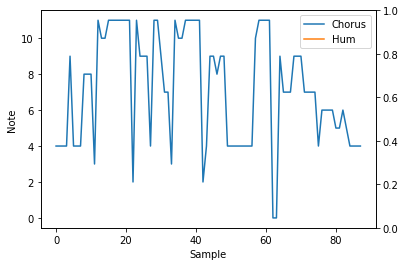

In [118]:
note_arr = np.array(['C','C#','D','D#','E','F','F#','G','G#','A','A#','B'])

plt.figure()
plt.plot(chorusdict['./Chorus\\AmericanBoyChorus.wav'], label="Chorus")
plt.plot(hum, label="Hum")
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Note')

plt2 = plt.twinx()  # instantiate a second axes that shares the same x-axis


plt.show()


#plt.savefig('AmericanBoy.png')

In [5]:
# audio_sm3, sr = librosa.load('StacysMomChorus.wav', sr=44100, mono=True)
chroma_sc, y_sc, sr_sc, song_length_sec_sc = pychorus.create_chroma('SweetCarolineChorus.wav')
chroma_gl, y_gl, sr_gl, song_length_sec_gl = pychorus.create_chroma('GetLuckyChorus.wav')
chroma_sm, y_sm, sr_sm, song_length_sec_sm = pychorus.create_chroma('StacysMomChorus.wav')
chroma_puk, y_puk, sr_puk, song_length_sec_puk = pychorus.create_chroma('PumpedUpKicksChorus.wav')
chroma_hum, y_hum, sr_hum, song_length_sec_hum = pychorus.create_chroma('SweetCarolineHum.wav')

# chroma_sc, y_sc, sr_sc, song_length_sec_sc = pychorus.create_chroma('SweetCaroline.wav')
# chroma_sm, y_sm, sr_sm, song_length_sec_sm = pychorus.create_chroma('GetLucky.wav')
# chroma_puk, y_puk, sr_puk, song_length_sec_puk = pychorus.create_chroma('PumpedUpKicks.wav')


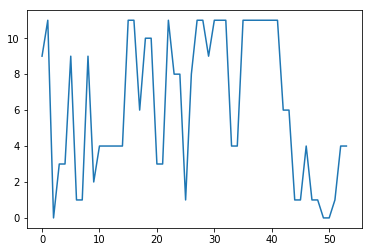

In [6]:
chorus_sm = []
for s in chroma_sm.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    chorus_sm.append(ind[0])

plt.figure()
plt.plot(chorus_sm)
plt.show()
  

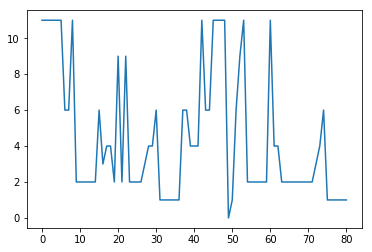

In [7]:
chorus_gl = []
for s in chroma_gl.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    chorus_gl.append(ind[0])

plt.figure()
plt.plot(chorus_gl)
plt.show()

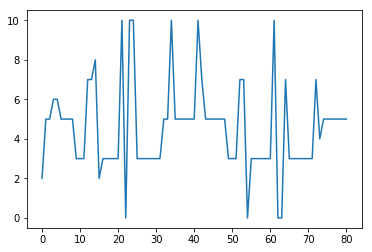

In [8]:
chorus_puk = []
for s in chroma_puk.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    chorus_puk.append(ind[0])

plt.figure()
plt.plot(chorus_puk)
plt.show()
  

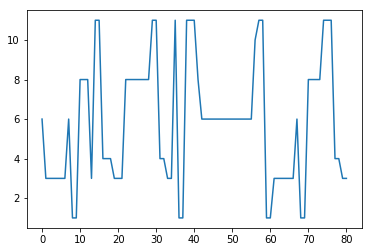

In [9]:
chorus_sc = []
for s in chroma_sc.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    chorus_sc.append(ind[0])

plt.figure()
plt.plot(chorus_sc)
plt.show()
  

In [113]:
hum = []
for s in chroma_hum.T:
    ind = np.unravel_index(np.argmax(s), s.shape)
    hum.append(ind[0])
    

# print(max(np.correlate(chorus_sc, hum, "full")))
# print(max(np.correlate(chorus_gl, hum, "full")))
# print(max(np.correlate(chorus_puk, hum, "full")))
# print(max(np.correlate(chorus_sm, hum, "full")))

print(sp.spatial.distance.cosine(chorus_sm[0:len(hum)], hum))



plt.figure()
plt.xlabel
plt.plot(note_arr, hum, label='hum')
plt.plot(chorus_sm, label="Stacy's Mom")
plt.legend()
plt.show()

NameError: name 'chroma_hum' is not defined

In [ ]:
librosa.display.specshow(chroma_hum, y_axis='chroma')

In [ ]:
librosa.display.specshow(chroma_sc, y_axis='chroma')